C:\Users\Howard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


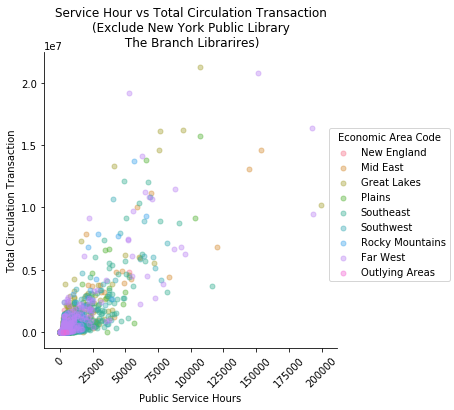

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
df =pd.read_csv("PLS_FY2016_AE_pupld16a.csv", encoding="cp1252")

df_test2 = df.loc[:,("LIBNAME","HRS_OPEN", "TOTCIR", "OBEREG")]
df_test2.replace(-3, np.nan, inplace = True)
df_test2.dropna(inplace = True)
df_test2.rename(index=str, columns={"OBEREG": "Economic Area Code"}, inplace = True)
#remove the outlier("NEW YORK PUBLIC LIBRARY, THE BRANCH LIBRARIES")
df_test2 = df_test2[df_test2["TOTCIR"] != df_test2["TOTCIR"].max()]


g =sns.lmplot(x="HRS_OPEN", y="TOTCIR",fit_reg=False, hue = "Economic Area Code" \
               ,data=df_test2 ,scatter_kws={'s':25,'alpha':0.4},palette = "husl" \
               ,legend_out = True)

new_labels = ['New England', 'Mid East',\
              'Great Lakes', 'Plains',\
              'Southeast',\
              'Southwest', 'Rocky Mountains',\
              'Far West', 'Outlying Areas']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.title("Service Hour vs Total Circulation Transaction\n(Exclude New York Public Library\n The Branch Librarires)")
plt.xlabel('Public Service Hours')
plt.ylabel('Total Circulation Transaction')

g.set_xticklabels(rotation=45)


